In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")
df = pd.read_csv("burritos.csv")

In [240]:
df

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Valentine's Mexican Food,Al Pastor,8/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,6.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,Valentine's Mexican Food,Chile Relleno,8/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,6.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,Valentine's Mexican Food,California,8/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,7.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,Valentine's Mexican Food,Shrimp,8/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,7.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploring Data

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        423 non-null    object 
 1   Burrito         423 non-null    object 
 2   Date            423 non-null    object 
 3   Neighborhood    92 non-null     object 
 4   Address         88 non-null     object 
 5   URL             87 non-null     object 
 6   Yelp            87 non-null     float64
 7   Google          87 non-null     float64
 8   Chips           26 non-null     object 
 9   Cost            416 non-null    float64
 10  Hunger          420 non-null    float64
 11  Mass (g)        22 non-null     float64
 12  Density (g/mL)  22 non-null     float64
 13  Length          284 non-null    float64
 14  Circum          282 non-null    float64
 15  Volume          282 non-null    float64
 16  Tortilla        423 non-null    float64
 17  Temp            403 non-null    flo

# Determine how many missing values are present in each column

In [209]:
df.isnull().sum()

Location          0
Burrito           0
Date              0
Neighborhood    331
Address         335
               ... 
Bacon           420
Sushi           421
Avocado         410
Corn            420
Zucchini        422
Length: 66, dtype: int64

# Determine the total amount of missing values


In [210]:
sum(df.isnull().sum())

18256

# Before replacing or filling null values. I need to eliminate all columns that has null over 70%


In [211]:
df.dropna(axis=1, thresh = int(0.7*df.shape[0]), inplace=True)

In [212]:
#We got 16 columns of 66
df.shape

(423, 16)

In [213]:
df.columns

Index(['Location', 'Burrito', 'Date', 'Cost', 'Hunger', 'Tortilla', 'Temp',
       'Meat', 'Fillings', 'Meat:filling', 'Uniformity', 'Salsa', 'Synergy',
       'Wrap', 'overall', 'Reviewer'],
      dtype='object')

# Replace with the mean


#### Create a histogram or bar chart of what the distribution of values looks like before handling NaN values.

In [214]:
#df["Cost"].astype(int)
d= df["Cost"]
sum(d.isnull())

7

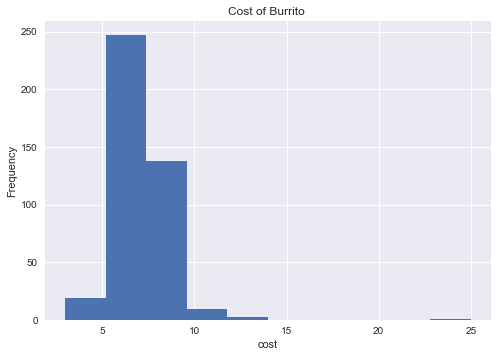

In [216]:
# I chose the mean for cost column because there is no big difference of costs
# Plot a histogram with bins=20 to see distribution of data
d= df["Cost"]
d.plot(kind="hist",title="Cost of Burrito ")
plt.xlabel("cost")
plt.show()
#I don't need Y labels since the frequency is what I need
#notice that x= 7 is less than 250

#### Create a histogram or bar chart of what the distribution of values looks like after handling NaN values.

In [217]:
#First fill with mean
cmean = round(df["Cost"].mean())
df["Cost"] = df["Cost"].fillna(cmean)
#check
sum(df["Cost"].isnull())

0

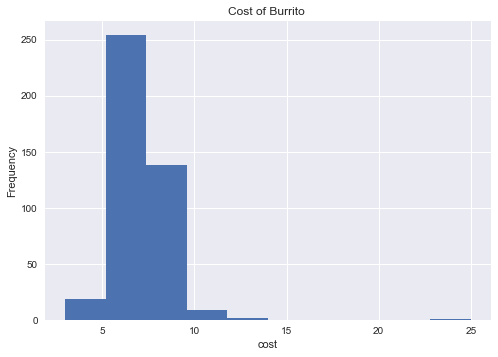

In [218]:
df["Cost"].plot(kind="hist",title="Cost of Burrito ")
plt.xlabel("cost")
plt.show()
#There is a slight differnce in 7 
#it has increased a little over 250.

# Replace with the median

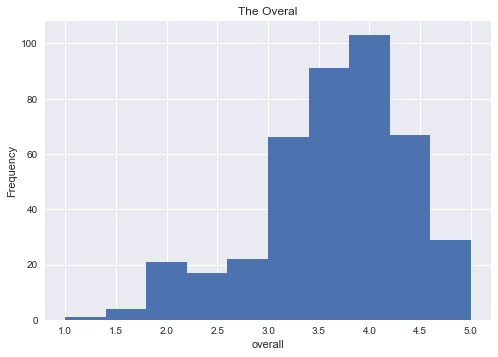

In [219]:
d= df["overall"]
d.plot(kind="hist",title="The Overal")
plt.xlabel("overall")
plt.show()
#I can see that most data are centered between 3.5 and 4.5

In [220]:
sum(d.isnull())
#There is just two missing values 
# In this case median will be appropriat

2

In [221]:
cmedian= df["overall"].median()
cmedian

3.8

In [222]:
df["overall"] = df["overall"].fillna(cmedian)
#Check
df["overall"].isnull().sum()

0

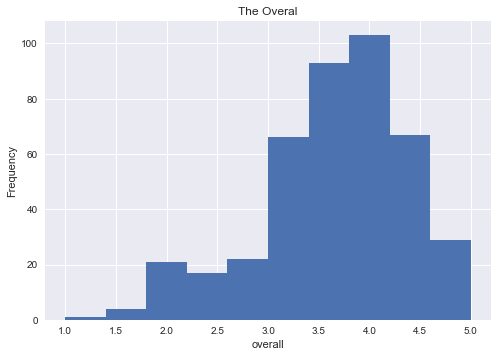

In [223]:
d= df["overall"]
d.plot(kind="hist",title="The Overal")
plt.xlabel("overall")
plt.show()

# Replace with the mode

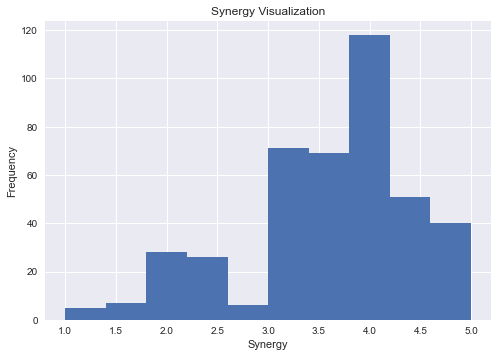

In [224]:
d= df["Synergy"]
d.plot(kind="hist",title="Synergy Visualization")
plt.xlabel("Synergy")
plt.show()
#my goal is to fill data without affecting the efficiency of the data

In [225]:
sum(df["Synergy"].isnull())
#it will not affect efficiency of data because it has just two missing values

2

In [226]:
df["overall"] = df["overall"].fillna(df["overall"].mode())
#Check
df["overall"].isnull().sum()

0

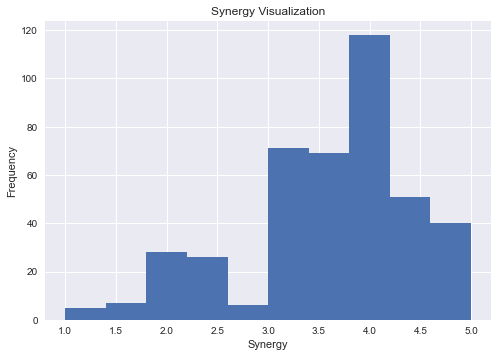

In [227]:
d= df["Synergy"]
d.plot(kind="hist",title="Synergy Visualization")
plt.xlabel("Synergy")
plt.show()

# Replace with your own value

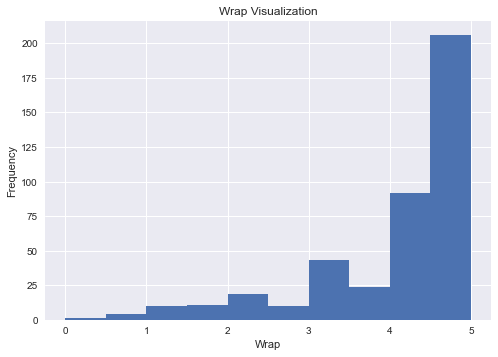

In [233]:
d= df["Wrap"]
d.plot(kind="hist",title="Wrap Visualization")
plt.xlabel("Wrap")
plt.show()
#After observing data I can see that 5 is the highest value, so I will fill with 5 

In [234]:
sum(d.isnull())

3

In [235]:
df["Wrap"] = df["Wrap"].fillna(5)
#Check
df["Wrap"].isnull().sum()

0

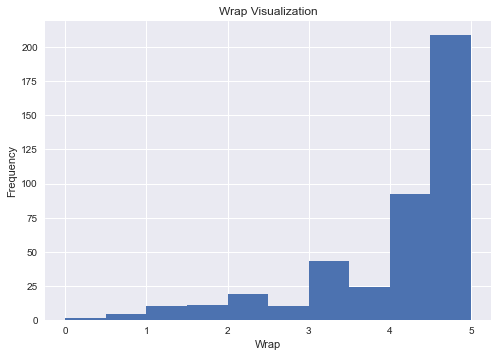

In [236]:
d= df["Wrap"]
d.plot(kind="hist",title="Wrap Visualization")
plt.xlabel("Wrap")
plt.show()

# Forwards filling

In [ ]:
#['Location', 'Burrito', 'Date', 'Hunger', 'Tortilla', 'Temp','Meat', 
#'Fillings', 'Meat:filling', 'Uniformity', 'Salsa', 'Reviewer']
#This is the columns that has never been filled 

In [ ]:
#Checked for data that has highest null values to fill the with forwards and backwards

In [299]:
g=df[(df['Location'].isnull()&df['Burrito'].isnull()&df['Date'].isnull()&df['Tortilla'].isnull())]
g 
#those has no nlls

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini


In [283]:
sum(df["Hunger"].isnull())

3

In [285]:
sum(df['Temp'].isnull())

20

In [309]:
sum(df["Salsa"].isnull())

25

In [300]:
sum(df["Fillings"].isnull())

3

In [303]:
sum(df["Meat:filling"].isnull())

9

In [301]:
sum(df["Meat"].isnull())

14

In [ ]:
#So salsa and Temp has highest missing values
#I will fill them with b/ffil.

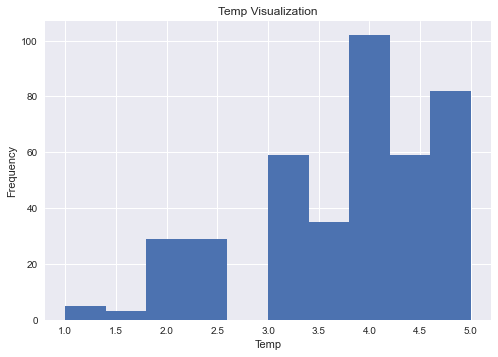

In [310]:
d= df["Temp"]
d.plot(kind="hist",title="Temp Visualization")
plt.xlabel("Temp")
plt.show()

In [311]:
df["Temp"].fillna(method="ffill")

0      5.0
1      3.5
2      2.0
3      2.0
4      5.0
      ... 
418    4.0
419    5.0
420    4.0
421    2.0
422    5.0
Name: Temp, Length: 423, dtype: float64

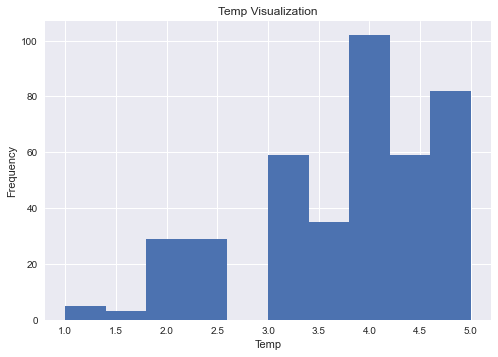

In [312]:
d= df["Temp"]
d.plot(kind="hist",title="Temp Visualization")
plt.xlabel("Temp")
plt.show()

# backward  filling

In [313]:
sum(df["Salsa"].isnull())

25

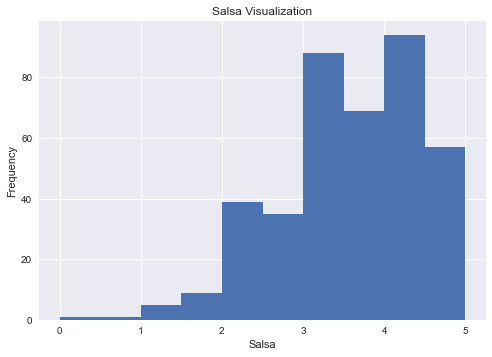

In [314]:
d= df["Salsa"]
d.plot(kind="hist",title="Salsa Visualization")
plt.xlabel("Salsa")
plt.show()

In [315]:
df["Salsa"].fillna(method="bfill")

0      4.0
1      3.5
2      3.0
3      4.0
4      2.5
      ... 
418    2.0
419    5.0
420    3.5
421    5.0
422    3.0
Name: Salsa, Length: 423, dtype: float64

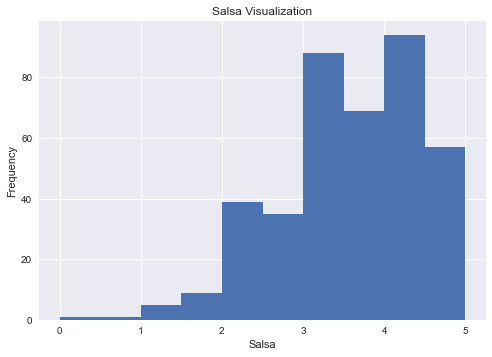

In [316]:
d= df["Salsa"]
d.plot(kind="hist",title="Salsa Visualization")
plt.xlabel("Salsa")
plt.show()